In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline  

In [4]:
dset = pd.read_csv('housing.csv')

In [5]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
dset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
dset.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  ho

In [8]:
dset.tail

<bound method NDFrame.tail of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  ho

In [9]:
dset.shape

(20640, 10)

In [10]:
dset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [12]:
category_column = dset.select_dtypes(include=['object']).columns
number_column = dset.select_dtypes(include=['number']).columns

In [14]:
dset['total_bedrooms'] = dset['total_bedrooms'].fillna(dset['total_bedrooms'].mode()[0])

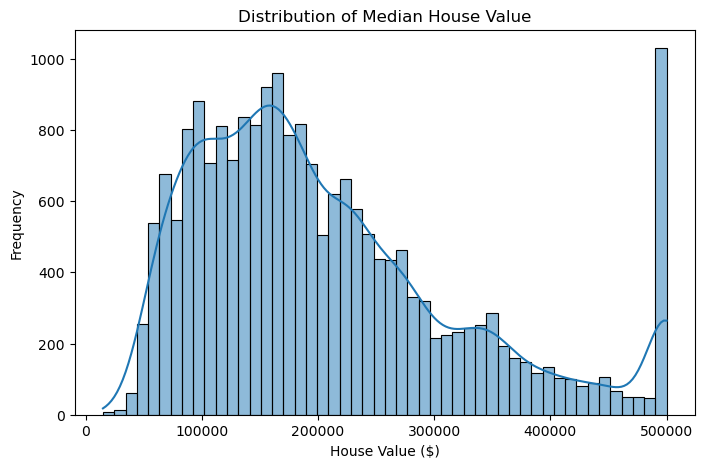

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(dset['median_house_value'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("House Value ($)")
plt.ylabel("Frequency")
plt.show()

In [21]:
x = dset.drop(columns=['median_house_value'])  
y = dset['median_house_value']

categorical_features = x.select_dtypes(include=['object']).columns
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler()


numerical_features = x_train.columns[:8]


x_train_scaled = scaler.fit_transform(x_train[numerical_features])
x_test_scaled = scaler.transform(x_test[numerical_features])


x_train[numerical_features] = pd.DataFrame(x_train_scaled, columns=numerical_features, index=x_train.index).astype(np.float64)
x_test[numerical_features] = pd.DataFrame(x_test_scaled, columns=numerical_features, index=x_test.index).astype(np.float64)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline 

In [26]:
X = dset.drop(columns=['median_house_value'])  
y = dset['median_house_value']  
categorical_features = x.select_dtypes(include=['object']).columns
numerical_features = x.select_dtypes(include=['int64', 'float64']).columns
x = pd.get_dummies(x, columns=categorical_features, drop_first=True)
scaler = StandardScaler()
x[numerical_features] = scaler.fit_transform(x[numerical_features])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (Degree=2)": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),  
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42)
}
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, rmse, r2])


results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R² Score"])


from IPython.display import display
display(results_df)

,Model,MAE,RMSE,R² Score
0,Linear Regression,50749.836124,70255.223787,0.623339
1,Polynomial Regression (Degree=2),47076.768974,69294.634944,0.633569
2,Ridge Regression,50757.212147,70263.153887,0.623254
3,Lasso Regression,50749.922588,70255.294359,0.623338
4,Random Forest Regression,31609.520824,49082.519752,0.816157
